# Getting started 
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

------------------------------------------

## Objective:

The repository is a learning exercise to:

- Apply the fundamental concepts of machine learning from an available dataset

The analysis is divided into four sections, saved in juypter notebooks in this repository

1. Identifying the problem and Data Sources
2. Data Explorations
3. Data Pre-Processing
4. Model Development
5. Model Improvement


---------------------------------------------------------------
# 1.  Identifying the problem and Getting data.

Identify the types of information contained in our data set In this notebook I used Python modules to import external data sets for the purpose of getting to know/familiarize myself with the data to get a good grasp of the data and think about how to handle the data in different ways. 

--------------------------------------------------------

### A. Import library

First, let’s import all/ minimum of the modules, functions and objects we are going to use in this tutorial



### B. Load Dataset

First, load the supplied CSV file using additional options in the Pandas read_csv function.
Inspecting the data or We can load the data directly from the UCI Machine Learning repository in sklearn.

The first step is to visually inspect the new data set. There are multiple ways to achieve this:

* The easiest being to request the first few records using the DataFrame data.head()* method. By default, “data.head()” returns the first 5 rows from the DataFrame object df (excluding the header row).
* Alternatively, one can also use “df.tail()” to return the five rows of the data frame.
* For both head and tail methods, there is an option to specify the number of records by including the required number in between the parentheses when calling either method.Inspecting the data

In [1]:
#import library
#---------------------------------------------

import numpy as np
from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt

print ("--libraries is complete--")

--libraries is complete--


In [2]:
# Load data 
# showing data information
# ----------------------------
dataset=load_boston()

# data information
print dataset.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

-----------------------------------------------------------

# 2. Data Explorations
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

### Statistical Summary

Now we can take a look at a summary of each attribute.

This includes the count, mean, the min and max values as well as some percentiles


In [3]:
# Use pandas as container the data
#---------------------------------------------

# set to pandas
pd_dataset=pd.DataFrame(dataset.data)
pd_dataset.columns= dataset.feature_names

# global name X,y for simple name
X= pd_dataset
y=dataset.target

print pd_dataset.head()


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


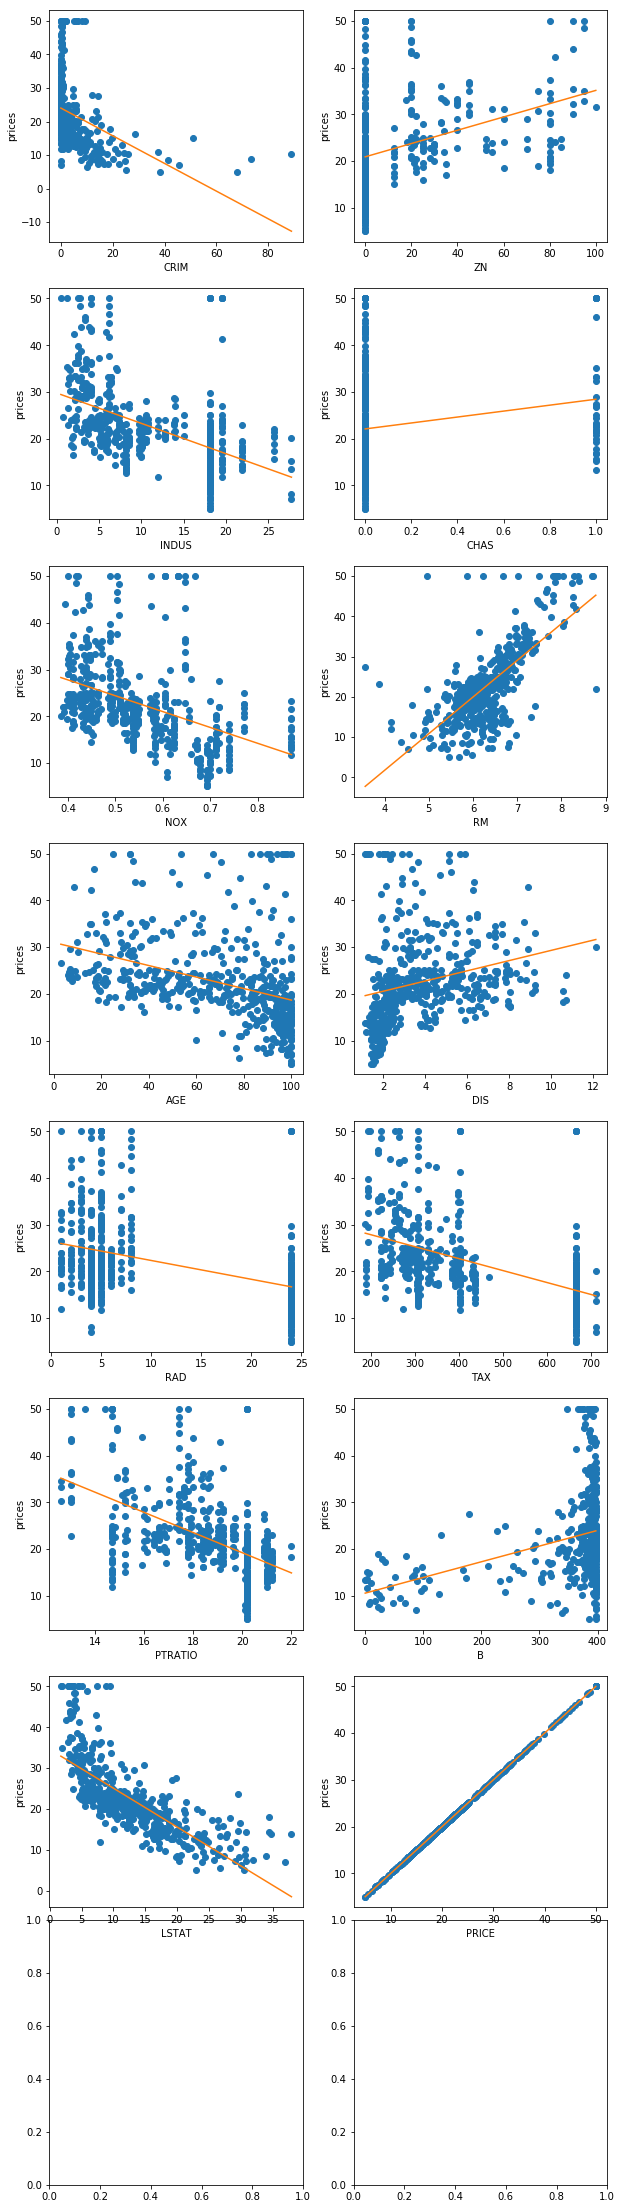

In [4]:
# Summirize dataset using matplotlib
# Plot histograms 
#-------------------------------------
from matplotlib import pyplot as plt
color_dic = {0:'red', 1:'blue'}

#Plot histograms 
data_mean=pd_dataset.copy()
data_mean['PRICE']=y

plt.subplots(nrows=7, ncols=2, figsize=(10, 40))

for i, col in enumerate(data_mean.columns):
    plt.subplot(8, 2, i+1)
    plt.plot(data_mean[col], data_mean['PRICE'], 'o')
    plt.plot(np.unique(data_mean[col]), np.poly1d(np.polyfit(data_mean[col], data_mean['PRICE'], 1))(np.unique(data_mean[col])))
    plt.xlabel(col)
    plt.ylabel('prices')

plt.show()


----------------------------------------
# 3. Data Preprocessing

Data preprocessing is a crucial step for any data analysis problem. It is often a very good idea to prepare your data in such way to best expose the structure of the problem to the machine learning algorithms that you intend to use.This involves a number of activities such as:
- Assigning numerical values to categorical data;
- Handling missing values; and
- Normalizing the features (so that features on small scales do not dominate when fitting a model to the data).

Goal : Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 

*) We assume that the dataset for this project is clean. So we not do preprocessing right now

--------------------------------

In this sections to improve the models, I use  some techniques, that are :(Ignoring when you try a simple way)
1. feature selection Using intuition
2. feature normalization
3. feature selection to reduce high-dimension data

### Feature selection Using intuition

based on intuition, we will use three features from the Boston housing dataset: 'RM', 'LSTAT', and 'PTRATIO'. For each data point (neighborhood):

- 'RM' is the average number of rooms among homes in the neighborhood.
-  'LSTAT' is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- 'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.


In [5]:
# Intuition Feature select 
#---------------------------------------------

# X=pd_dataset.loc[:,['RM','PTRATIO','LSTAT']]

### Feature Normalization

In [6]:
# # preprocessing code # Data pre-processing
#---------------------------------------------

# #feature normalization
# from sklearn.preprocessing import StandardScaler
# data_scaler=StandardScaler()
# Xs=data_scaler.fit_transform(X)

### Feature Reduction using PCA


In [7]:
# # feature selection and feature reduction

# from sklearn.decomposition import PCA
# import numpy as np
# # feature extraction
# pca = PCA(n_components=10)
# X_reduc = pca.fit_transform(Xs)

# # summarize components
# print("Explained Variance ratio: %s") % (sum(pca.explained_variance_ratio_))

# #The amount of variance that each PC explains
# var= pca.explained_variance_ratio_
# print print("Explained Variance: ",pca.explained_variance_)  
# #Cumulative Variance explains
# var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)              
# print(var1)
# X=X_reduc

# # Deciding How Many Principal Components to Retain
# # - Kaiser’s criterion,Elbow
# # - screeplot
# plt.plot(pca.explained_variance_)
# plt.title('Scree Plot')
# plt.xlabel('Principal Component')
# plt.ylabel('Eigenvalue')

# leg = plt.legend(['Eigenvalues from PCA'], loc='best', borderpad=0.3,shadow=False,markerscale=0.4)
# leg.get_frame().set_alpha(0.4)
# leg.draggable(state=True)
# plt.show()

### Data Representation



In [8]:
print '----Data inputs---'
print X[:5]
print '\n'
print '----Data targets---'
print  y[:5]

----Data inputs---
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


----Data targets---
[ 24.   21.6  34.7  33.4  36.2]


----------------------------------------------------------
# 4. Models Development 

In this section of the project, you will develop the tools and techniques necessary for models to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

We don’t know which algorithms would be good on this problem or what configurations to use. We get an idea from the plots that some of the classes are partially linearly separable in some dimensions, so we are expecting generally good results.

Let’s evaluate 3 different algorithms:
- Gradient Boosting Regressor
- Linear Regression
- SVM

----------------------------------------------------------
### A. Split Data
Before build the models, the next implementation requires that you take the dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:

- Use train_test_split from sklearn.cross_validation to shuffle and split the features and prices data into training and testing sets.
- Split the data into 70% training and 30% testing.
- Set the random_state for train_test_split to a value of your choice. This ensures results are consistent.
    Assign the train and testing splits to X_train, X_test, y_train, and y_test.


### B. Models Validation

It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the coefficient of determination(R2) and Mean square Error to quantify our model's performance. 
+ The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable
+ The mean squared error tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them. The squaring is necessary to remove any negative signs. It also gives more weight to larger differences. It’s called the mean squared error as you’re finding the average of a set of errors.



### C. Cross validation
Cross Validation technique  assess the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. 
Tthis is one of resampling methods to make the best use of your training data in order to accurately estimate the performance of a model on new unseen data.


Accurate estimates of performance can then be used to help you choose which set of model parameters to use or which model to select. Once you have chosen a model, you can train for final model on the entire training dataset and start using it to make predictions.


In [9]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#we use most of the algorithms for regression algorithm
regressors=[GradientBoostingRegressor(),
            LinearRegression(),
            SVR()    
           ]


In [10]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,KFold

# initalization validation score for reports
valid_scores={'MSE':[],'R2':[], 'k-fold':[]}
methods=[]

for clf in regressors:
    clf.fit(X_train, y_train)    
    predict_score=clf.predict(X_test)
    kfold = KFold(n_splits=10, random_state=42)
    scores_fold = cross_val_score(clf, X, y, cv=kfold, scoring='neg_mean_squared_error')
   
    name= clf.__class__.__name__
    methods.append(name)
    valid_scores['MSE'].append(mean_squared_error(y_test, predict_score))  
    valid_scores['R2'].append(r2_score(y_test, predict_score))
    valid_scores['k-fold'].append((np.mean(scores_fold)))

In [11]:
# show evaluation
pd_score=pd.DataFrame(valid_scores)
pd_score.index=methods
print pd_score

                                 MSE        R2     k-fold
GradientBoostingRegressor   8.576512  0.884899 -18.213380
LinearRegression           21.540219  0.710920 -34.763092
SVR                        73.222321  0.017323 -91.047824


-------------------------------------------------------------
# 5. Model Improvement


Find the most predictive features of the data and filter it so it will enhance the predictive power of the analytics model. 
In this project I use two sub step to improve the accuracy the best model, that are: 

1. Preprocessing : We use feature selection to reduce high-dimension data, feature extraction and transformation for dimensionality reduction
2. parameters tuning  in order to find one with the best model's performance with best parameters ( hyper-parameters). 

Note : Machine learning models are parameterized so that their behavior can be tuned for a given problem.
Models can have many parameters and finding the best combination of parameters can be treated as a search problem. Not all parameters of a classifier is learned from the estimators. Those parameters are called hyper-parameters and are passed as arguments to the constructor of the classifier. Each estimator has a different set of hyper-parameters, which can be found in the corresponding documentation.
We can search for the best performance of the classifier sampling different hyper-parameter combinations. This will be done with an exhaustive grid search, provided by the GridSearchCV function.




## Gradient Boosting Regressor tune parameters

In [12]:
#code Gridsearch here

print('--------- Now Trying Gradient Boosting Regressor ---------')

from sklearn.model_selection import GridSearchCV

gr = GradientBoostingRegressor()

# Finally experiment with SVR
param_grid={'n_estimators':[100], 
            'learning_rate': [0.1,0.05, 0.02, 0.01],            
            'max_depth':[4,6,7,9], 
            'min_samples_leaf':[3,5,7], 
            'max_features':[1.0,0.3,0.1]
           } 
            
grid_search = GridSearchCV(gr, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
gr_best = grid_search.best_estimator_
predictions_gr = gr_best.predict(X_test)


print(grid_search.best_params_)
print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_gr)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_gr)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_gr)))

--------- Now Trying Gradient Boosting Regressor ---------
{'max_features': 0.3, 'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 4, 'min_samples_leaf': 7}
MSE: 10.452
MAE: 2.109
R^2: 0.860


## SVR tune parameters

In [13]:
#code Gridsearch here
print('--------- Now Trying SVR ---------')

from sklearn.model_selection import GridSearchCV

svr = SVR(kernel='linear')

# Finally experiment with SVR
param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000.]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}]
        

grid_search = GridSearchCV(svr, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

svr_best = grid_search.best_estimator_
# print grid_search.best_score_

predictions_svr = svr_best.predict(X_test)

print('MSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_svr)))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_svr)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_svr)))

--------- Now Trying SVR ---------
{'kernel': 'linear', 'C': 10.0}
MSE: 25.986
MAE: 3.221
R^2: 0.651
